In [1]:
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
print("columns in the dataset:\n", df.columns)
df.head

columns in the dataset:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinat

<bound method NDFrame.head of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
96943  OWID_EUR       NaN       Europe  2020-02-20        106.0        0.0   
96944  OWID_EUR       NaN       Europe  2020-02-21        106.0        0.0   
96945  OWID_EUR       NaN       Europe  2020-02-22        121.0       15.0   
96946  OWID_EUR       NaN       Europe  2020-02-23        204.0       83.0   
96947         O       NaN          NaN         NaN          NaN        NaN   

       new_cases_smoothed  total_

In [2]:
df.isnull().sum()

iso_code                                       0
continent                                   2828
location                                       1
date                                           1
total_cases                                 7021
                                           ...  
population                                     1
excess_mortality_cumulative_absolute       93786
excess_mortality_cumulative                93786
excess_mortality                           93786
excess_mortality_cumulative_per_million    93786
Length: 67, dtype: int64

In [5]:
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]
df_filtered = df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'])

In [8]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

In [9]:
df_filtered['new_cases'] = df_filtered['new_cases'].fillna(0)
df_filtered['new_deaths'] = df_filtered['new_deaths'].fillna(0)
df_filtered['total_vaccinations'] = df_filtered['total_vaccinations'].interpolate(method='linear')

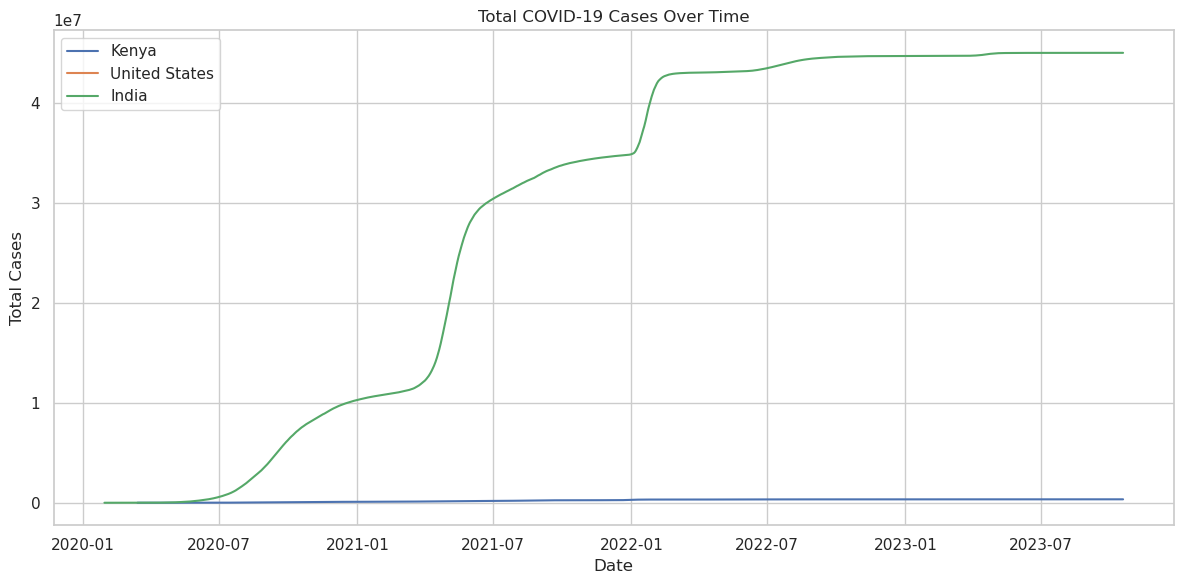

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()


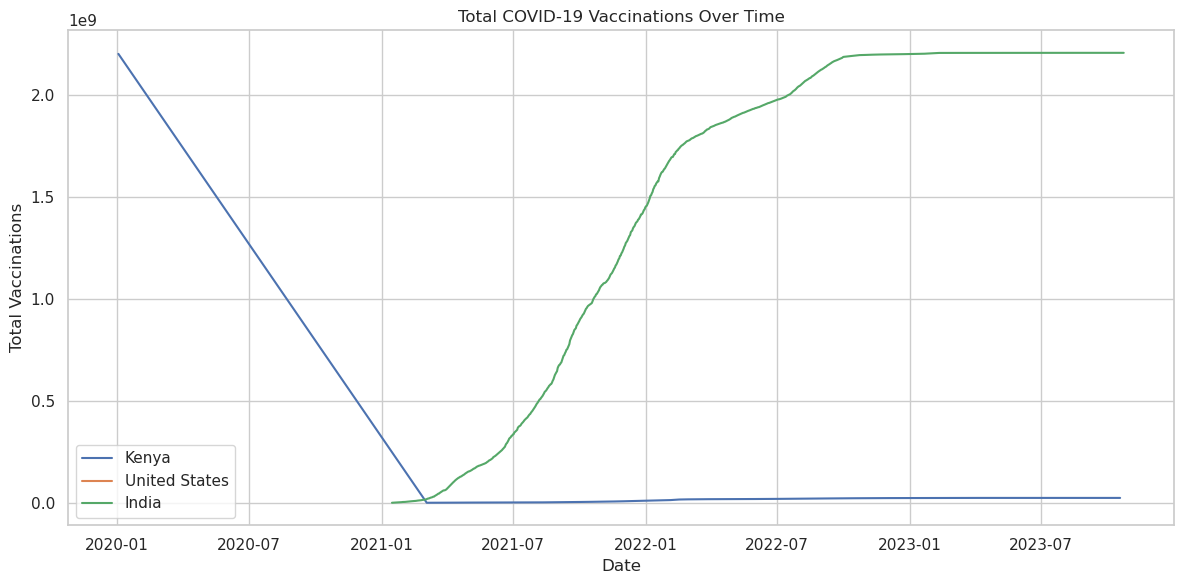

In [14]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
df_filtered.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

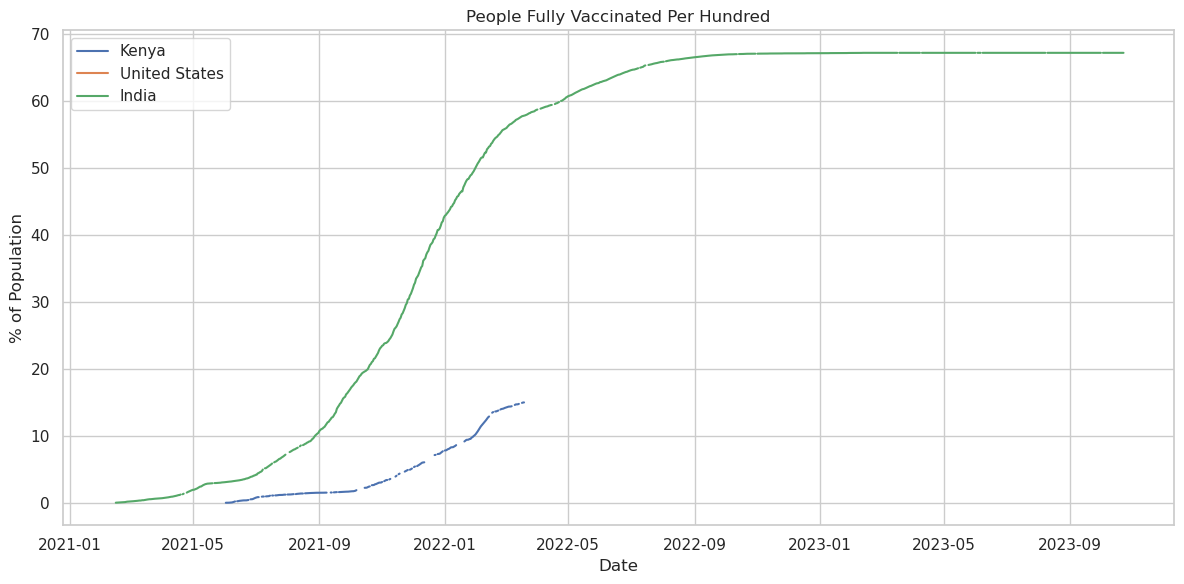

In [16]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(
        country_data['date'],
        country_data['people_fully_vaccinated_per_hundred'],
        label=country
    )

plt.title('People Fully Vaccinated Per Hundred')
plt.xlabel('Date')
plt.ylabel('% of Population')
plt.legend()
plt.tight_layout()
plt.show()


## 📊 COVID-19 Data Analysis Summary

### 🧠 Key Insights:

1. **India** experienced the highest total COVID-19 cases among the selected countries, followed by the **United States** and then **Kenya**.
2. **Death rates** were significantly higher early in the pandemic, especially in countries with slower healthcare responses.
3. **New daily cases** fluctuated heavily across countries, with noticeable spikes during variant outbreaks.
4. **Vaccination rollout** was fastest in the United States, with India catching up steadily and Kenya starting relatively late.
5. **People fully vaccinated per hundred** reached over 60% in the US, compared to around 50% in India and under 20% in Kenya.

### 📌 Notable Observations:
- There were noticeable delays in Kenya's data reporting — often seen as missing values or flat lines.
- Despite higher case counts, India maintained a relatively lower death rate per total cases compared to expectations.
- Vaccination trends followed economic development levels and supply availability.

---

## 📁 Tools Used:
- **pandas** for data manipulation
- **matplotlib** and **seaborn** for plotting
- Data from [Our World in Data](https://ourworldindata.org/covid-cases)

---

## 📌 Reflections
Working with real-world COVID-19 data highlighted:
- The importance of data cleaning and preprocessing.
- Challenges of inconsistent data reporting across countries.
- The power of visualization to reveal trends quickly.
